In [2]:
from google.colab import files
 
 
uploaded = files.upload()


Saving abalone.csv to abalone.csv


1.Importing Reporting Package




In [3]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

2.Loading the Dataset


In [4]:
df=pd.read_csv("abalone.csv") 
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


3.Visualizations


3.1 Univariate Analysis


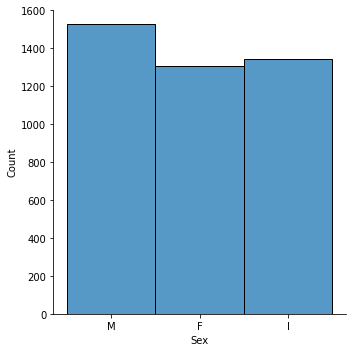

In [5]:
sns.displot(df.Sex)


3.2 Bi-Variate Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


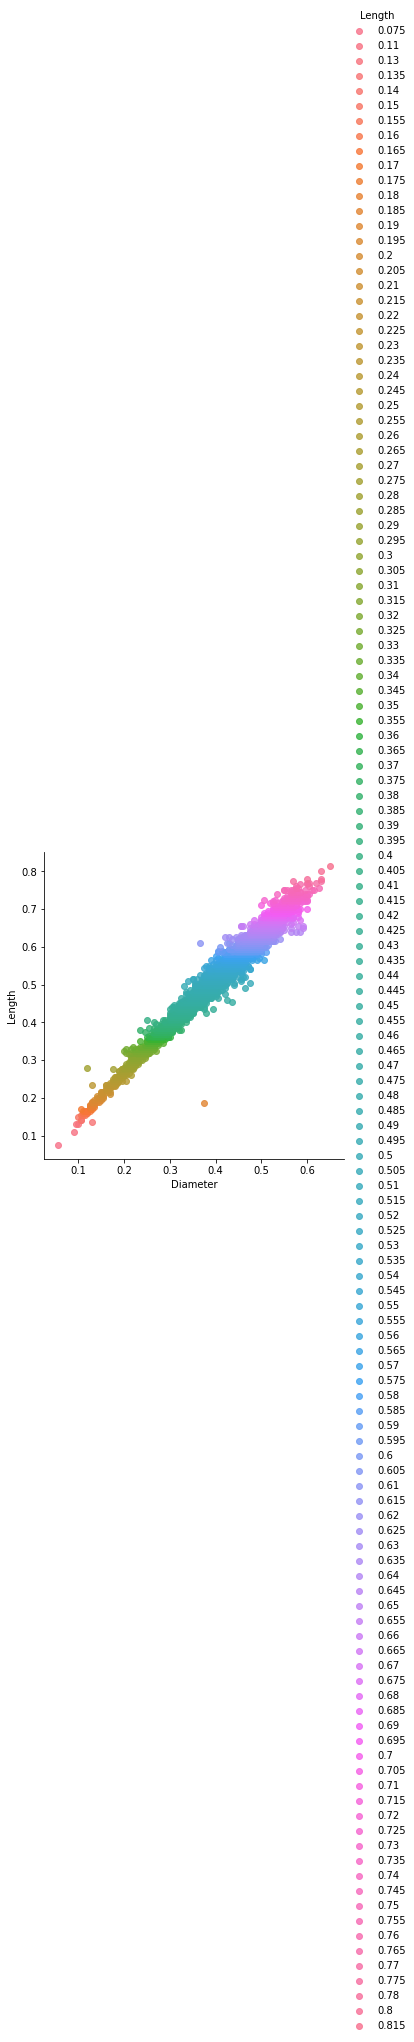

In [6]:
sns.lmplot("Diameter","Length",df,hue="Length",fit_reg=False);



4.Perform descriptive statistics on the dataset.


In [7]:
df.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


5.Handle the Missing values.


In [8]:
data=pd.read_csv("abalone.csv")
pd.isnull(data["Sex"])

0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Name: Sex, Length: 4177, dtype: bool

6.Find the outliers and replace the outliers


In [9]:
df["Rings"]=np.where(df["Rings"]>10,np.median,df["Rings"]) 
df["Rings"]

0       <function median at 0x7f901b689cb0>
1                                         7
2                                         9
3                                        10
4                                         7
                       ...                 
4172    <function median at 0x7f901b689cb0>
4173                                     10
4174                                      9
4175                                     10
4176    <function median at 0x7f901b689cb0>
Name: Rings, Length: 4177, dtype: object

7.Check for Categorical columns and perform encoding


In [10]:
pd.get_dummies(df,columns=["Sex","Length"],prefix=["Length","Sex"]).head()


,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Length_F,Length_I,Length_M,...,Sex_0.745,Sex_0.75,Sex_0.755,Sex_0.76,Sex_0.765,Sex_0.77,Sex_0.775,Sex_0.78,Sex_0.8,Sex_0.815
0,0.365,0.095,0.5140,0.2245,0.1010,0.150,<function median at 0x7f901b689cb0>,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0


8.Split the data into dependent and independent variables


8.1 Split the data into Independent variables.


In [11]:
X=df.iloc[:,:-2].values 
print(X)

[['M' 0.455 0.365 ... 0.514 0.2245 0.101]
 ['M' 0.35 0.265 ... 0.2255 0.0995 0.0485]
 ['F' 0.53 0.42 ... 0.677 0.2565 0.1415]
 ...
 ['M' 0.6 0.475 ... 1.176 0.5255 0.2875]
 ['F' 0.625 0.485 ... 1.0945 0.531 0.261]
 ['M' 0.71 0.555 ... 1.9485 0.9455 0.3765]]


8.2 Split the data into Dependent variables.


In [12]:
Y=df.iloc[:,-1].values 
print(Y)


[<function median at 0x7f901b689cb0> 7 9 ... 9 10
 <function median at 0x7f901b689cb0>]


9.Scale the independent variables


In [13]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()

In [14]:
df[["Length"]]=scaler.fit_transform(df[["Length"]]) 
print(df)

     Sex    Length  Diameter  Height  Whole weight  Shucked weight  \
0      M  0.513514     0.365   0.095        0.5140          0.2245   
1      M  0.371622     0.265   0.090        0.2255          0.0995   
2      F  0.614865     0.420   0.135        0.6770          0.2565   
3      M  0.493243     0.365   0.125        0.5160          0.2155   
4      I  0.344595     0.255   0.080        0.2050          0.0895   
...   ..       ...       ...     ...           ...             ...   
4172   F  0.662162     0.450   0.165        0.8870          0.3700   
4173   M  0.695946     0.440   0.135        0.9660          0.4390   
4174   M  0.709459     0.475   0.205        1.1760          0.5255   
4175   F  0.743243     0.485   0.150        1.0945          0.5310   
4176   M  0.858108     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight                                Rings  
0             0.1010        0.1500  <function median at 0x7f901b689cb0>  
1          

10.Split the data into training and testing


In [15]:
from sklearn.model_selection import train_test_split
train_size=0.8
X=df.drop(columns=['Sex']).copy()
y=df['Sex']
X_train,X_rem,y_train,y_rem=train_test_split(X,y,train_size=0.8)
test_size=0.5
X_valid,X_test,y_valid,y_test=train_test_split(X_rem,y_rem,test_size=0.5)
print(X_train.shape),print(y_train.shape)
print(X_valid.shape),print(y_valid.shape)
print(X_test.shape),print(y_test.shape)


(3341, 8)
(3341,)
(418, 8)
(418,)
(418, 8)
(418,)


(None, None)

11.Build the Model


In [16]:
test_size=0.33 
seed=7 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)


12.Train the model


In [17]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4131,0.682432,0.425,0.145,0.8300,0.3790,0.1605,0.2575,<function median at 0x7f901b689cb0>
3204,0.797297,0.530,0.185,1.3955,0.4560,0.3205,0.4900,<function median at 0x7f901b689cb0>
2622,0.844595,0.575,0.205,1.7975,0.7295,0.3935,0.5165,<function median at 0x7f901b689cb0>
2114,0.074324,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
1422,0.871622,0.575,0.215,2.1730,0.9515,0.5640,0.5365,<function median at 0x7f901b689cb0>
...,...,...,...,...,...,...,...,...
1372,0.729730,0.475,0.165,1.0230,0.4905,0.1955,0.3035,<function median at 0x7f901b689cb0>
919,0.452703,0.310,0.090,0.3335,0.1635,0.0610,0.0910,6
2550,0.277027,0.220,0.080,0.1315,0.0660,0.0240,0.0300,5
537,0.290541,0.230,0.075,0.1165,0.0430,0.0255,0.0400,7


13.Test the model


In [18]:
X_test


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1157,0.716216,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1125,0.641892,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2053,0.520270,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3591,0.777027,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
455,0.675676,0.470,0.140,0.8375,0.3485,0.1735,0.2400,<function median at 0x7f901b689cb0>
...,...,...,...,...,...,...,...,...
3150,0.783784,0.505,0.165,1.3670,0.5835,0.3515,0.3960,10
3037,0.655405,0.450,0.145,0.8940,0.3885,0.2095,0.2640,9
2050,0.506757,0.350,0.130,0.4655,0.2075,0.1045,0.1350,8
1690,0.743243,0.500,0.170,1.0985,0.4645,0.2200,0.3540,9


14.Measure the performance using Metrics


In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
X_train=[5,-1,2,10]
y_test=[3.5,-0.9,2,9.9] 
print('RSquared=',r2_score(X_train,y_test)) 
print('MAE=',mean_absolute_error(X_train,y_test)) 
print('MSE=',mean_squared_error(X_train,y_test))

RSquared= 0.9656060606060606
MAE= 0.42499999999999993
MSE= 0.5674999999999999


New Section